<a href="https://colab.research.google.com/github/nestorfranca/Sistemas-Digitais-Embarcados-/blob/main/processador_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# biblioteca do verilog
%%bash
sudo apt-get update
sudo apt-get install verilog iverilog gtkwave

In [ ]:
!pip install git+https://github.com/lesc-ufv/cad4u >& /dev/null
!git clone https://github.com/lesc-ufv/cad4u >& /dev/null
%load_ext plugin

# Projeto de processador (versão final)

### Diagrama Geral

Author: Nestor França

<p align="center">
  <img src="https://raw.githubusercontent.com/Gustavo-A-Mendes/sistemas-digitais-embarcados/refs/heads/main/projeto-unidade-02/img/diagrama-geral.png" alt="Diagrama_MIPS_16.png">
</p>



##Diagrama para Funções do tipo_R

<p align="center">
  <img src="https://raw.githubusercontent.com/Gustavo-A-Mendes/sistemas-digitais-embarcados/refs/heads/main/projeto-unidade-02/img/diagrama-instrucao-tipo-R.png" alt="Diagrama_Instrução_tipo_R.png">
</p>


##Diagrama para Funções do tipo_I (sw)

<p align="center">
  <img src="https://raw.githubusercontent.com/Gustavo-A-Mendes/sistemas-digitais-embarcados/refs/heads/main/projeto-unidade-02/img/diagrama-instrucao-tipo-I-sw.png" alt="Diagrama_Instrução_tipo_R.png">
</p>

##Diagrama para Funções do tipo_I (lw)

<p align="center">
  <img src="https://raw.githubusercontent.com/Gustavo-A-Mendes/sistemas-digitais-embarcados/refs/heads/main/projeto-unidade-02/img/diagrama-instrucao-tipo-I-lw.png" alt="Diagrama_Instrução_tipo_R.png">
</p>

##Diagrama para Funções do tipo_I (beq)

<p align="center">
  <img src="https://raw.githubusercontent.com/Gustavo-A-Mendes/sistemas-digitais-embarcados/refs/heads/main/projeto-unidade-02/img/diagrama-instrucao-tipo-I-beq.png" alt="Diagrama_Instrução_tipo_R.png">
</p>

##Diagrama para Funções do tipo_J

##Diagrama para Funções do tipo_J (jmp)

<p align="center">
  <img src="https://raw.githubusercontent.com/Gustavo-A-Mendes/sistemas-digitais-embarcados/refs/heads/main/projeto-unidade-02/img/diagrama-instrucao-tipo-J.png" alt="Diagrama_Instrução_tipo_R.png">
</p>

####Instruções

<p align="center">
  <img src="https://raw.githubusercontent.com/Gustavo-A-Mendes/sistemas-digitais-embarcados/refs/heads/main/projeto-unidade-02/img/Instru%C3%A7%C3%B5es.png" alt="Diagrama_Instrução_tipo_R.png">
</p>

**lw rs, Offset(rt);**


*   3 bits ( opcode ) = 001
*   3 bits ( registrador fonte ) = 000
*   3 bits ( registrador destino ) = 001
*   7 bits ( imediato ) = 0000011


**lw rs, Offset(rt);**


*   3 bits ( opcode ) = 001
*   3 bits ( registrador fonte ) = 000
*   3 bits ( registrador destino ) = 010
*   7 bits ( imediato ) = 0000101


**add rs, rt, rd;**


*   3 bits ( opcode ) = 000
*   3 bits ( registrador origem 1 ) = 001
*   3 bits ( registrador origem 2 ) = 010
*   3 bits ( registrador destino ) = 011
*   4 bits ( func ) = 0000

**sub rs, rt, rd;**


*   3 bits ( opcode ) = 000
*   3 bits ( registrador origem 1 ) = 010
*   3 bits ( registrador origem 2 ) = 001
*   3 bits ( registrador destino ) = 100
*   4 bits ( func ) = 0001


**sw rs, Offset(rt);**


*   3 bits ( opcode ) = 010
*   3 bits ( registrador fonte ) = 000
*   3 bits ( registrador origem ) = 011
*   7 bits ( imediato ) = 0000000

**jmp 12;**


*   3 bits ( opcode ) = 100
*   13 bits ( destino ) = 0000000001100


**beq rs, rt, Offset();**


*   3 bits ( opcode ) = 011
*   3 bits ( registrador 1 ) = 001
*   3 bits ( registrador 2 ) = 010
*   7 bits ( deslocamento ) = 0000010

In [ ]:
%%file instructions_test.txt
00100000 10000011
00100001 00000101
10000000 00000111
00000101 00110000
00001000 11000001
01000001 10000000
01000010 00000000
00000101 00110100
01000001 10000000
10000000 00000011

Writing instructions_test.txt


In [ ]:
%%file instructions_test_beq.txt
00100000 10000011
00100001 00000011
01100101 00000011
00100000 10000101
00100001 00000101
01000000 10000000
01000001 00000001

Writing instructions_test_beq.txt


In [ ]:
%%file instructions_test_.txt
00100000 10000010
00100001 00000011
00000101 00110001
01000001 10000000

Overwriting instructions_test_.txt


##**Módulos**

###**Módulo PC**

In [ ]:
%%file pc.sv
// Contador de programa (PC)
module pc (clk, comandos, instruction, zero, address);
    // Declaracao de portas
    input clk, zero;
    input [9:0] comandos;
    input [15:0] instruction;
    output reg [15:0] address;

    // Variaveis intermediarias
    wire [15:0] extensao = { 9'd0, instruction[6:0] };
    wire [15:0] shift = extensao << 1;
    wire muxBranch = comandos[3]; // Branch
    wire muxJump = comandos[0]; // Jump

    // Iniciando endereco
    initial begin
        address = -16'd2;
    end

    // Funcionamento do contador
    always @( posedge clk ) begin
            address = address + 16'd2; // soma 2 para ir para a proxima instrução   // não pode ser não bloqueante ( paralelo )
        // Condicao do Jump
        if ( muxJump == 1'b1 ) begin
            address = {address[15:14], (instruction[12:0] << 1)};   // não pode ser não bloqueante ( paralelo )
        end
        // Condicao do Branch
        if (( muxBranch == 1'b1 ) & ( zero == 1'b1 ) & ( muxJump == 1'b0 )) begin   // não pode ser não bloqueante ( paralelo )
            address = address + shift;
        end
    end

endmodule

Writing pc.sv


###**Módulo Memória de Instruções**

In [ ]:
%%file instructions_memory.sv
`define NULL 0

// Memória de instrucoes
module instructions_memory ( clk, pc, instruction );
    // Declaracao de portas
    input clk;
    input [15:0] pc;
    output [15:0] instruction;

    integer f, r; // arquivo
    reg [7:0] data = 8'd0;
    integer counterMemory = 16'd0;

    // Criando uma memoria de instrucoes com 100 enderecos de 8 bits
    reg [7:0] memoriaInstrucoes [99:0];

    initial begin
        // Abrindo arquivo
        f = $fopen("/content/instructions_test_.txt","r");
        // Se arquivo nao contem nenhuma informacao
        if ( f == `NULL ) begin
            $display("Arquivo sem instrucoes");
            $finish;
        end

        while (! $feof( f )) begin
            r = $fscanf( f,"%8b\n", data);
            memoriaInstrucoes[counterMemory] = data;
            counterMemory = counterMemory + 16'd1;
        end

        // Fechando arquivo
        $fclose( f );
    end

// Atribuindo o valor da instrucao
assign instruction = { memoriaInstrucoes[ pc + 16'd0 ],
                       memoriaInstrucoes[ pc + 16'd1 ]};

endmodule

Writing instructions_memory.sv


**Dados**: Cada linha do banco de registradores contém um dado.

```
  endereço do registrador
       | 3 bits  |
        --------------------------------------
dados  |    3    |    5    |  . . .  |        |  (16 bits)
        --------------------------------------
                     16 endereços
```

###**Módulo Banco de Registradores**

In [ ]:
%%file register_bank.sv
// Banco de registradores
module register_bank ( clk, comandos, instruction, data_in, out1, out2, out3, memory );
    // Declaracao de portas
    input clk;
    input [9:0] comandos;
    input [15:0] instruction;
    input [15:0] data_in;
    output [15:0] out1, out2, out3;
    // 5 enderecos do banco de registradores
    output reg [127:0] memory;

    // Variaveis intermediarias
    wire RegDst = comandos[9];
    wire ALUscr = comandos[8];
    wire RegWrite = comandos[6];

    wire [2:0] addr_regd, addr_reg1, addr_reg2;

    assign addr_reg1 = instruction[12:10];
    assign addr_reg2 = instruction[9:7];
    assign addr_regd = ( RegDst == 1'b0 ) ? instruction[9:7] : instruction[6:4];

    wire [15:0] extensao = {9'd0, instruction[6:0]};

    // Criando um banco de registradores com 8 enderecos de 16 bits
    reg [15:0] registerBank [7:0]; // 8 pq so tem 3 bits para representar os endereços

    // Inicializando o banco de registradores com valores iniciais
    integer i;
    initial begin
        for (i = 0; i < 8; i = i + 1) begin
        registerBank[i] = 16'd0;
        end
    end

    // Descrevendo o comportamento de escrita no banco de registradores
    always @(posedge clk, data_in ) begin
        if ( RegWrite == 1'b1 ) begin
        registerBank[addr_regd] <= data_in;   // causa problema
        end
    end

    assign out1 = registerBank[addr_reg1];
    assign out2 = (ALUscr == 1'b1) ? extensao : registerBank[addr_reg2];
    assign out3 = registerBank[addr_reg2];

    always @( posedge clk, data_in ) begin
        memory = {registerBank[0], registerBank[1], registerBank[2], registerBank[3], registerBank[4]};
    end

endmodule

Overwriting register_bank.sv


###**Módulo Controle**


<p align="center">
  <img src="https://raw.githubusercontent.com/Gustavo-A-Mendes/sistemas-digitais-embarcados/refs/heads/main/projeto-unidade-02/img/Sinais%20de%20Controle.png" alt="Diagrama_Instrução_tipo_R.png">
</p>

| Tipo | Instrução | OPcode |
|:----:|:---------:|:------:|
|   R  |     -     |   000  |
|   I  |     lw    |   001  |
|   I  |     sw    |   010  |
|   I  |    beq    |   011  |
|   J  |     -     |   100  |

In [ ]:
%%file control.sv
// Controle
module control ( opcode, out );
    input [2:0] opcode;
    // RegDst, ALUscr, MemtoReg, RegWrite, MemRead, MemWrite, Branch, ALUOp, Jump
    output reg [9:0] out;

    always @( opcode ) begin
        casex ({opcode})
        3'b000 : out = 10'b1001000000; // Tipo R
        3'b001 : out = 10'b0111100110; // LW (Tipo I)
        3'b010 : out = 10'b0100010110; // SW (Tipo I)
        3'b011 : out = 10'bx0x0001010; // BEQ (Tipo I)
        3'b100 : out = 10'b0000000001; // (Tipo J)
        default   : out = 10'bxxxxxxxxxx;
        endcase
    end

endmodule

Writing control.sv


###**Módulo Controle da ULA**

<p align="center">
  <img src="https://raw.githubusercontent.com/Gustavo-A-Mendes/sistemas-digitais-embarcados/refs/heads/main/projeto-unidade-02/img/Controle%20da%20ULA.png" alt="Controle_ULA.png">
</p>

In [ ]:
%%file control_ULA.sv
// Controle
module control_ULA ( ULAOp, funct, out );
    input [1:0] ULAOp;
    input [3:0] funct;
    output reg [3:0] out;

    always @( ULAOp, funct ) begin
        casex ({ULAOp,funct})
        6'b11xxxx : out = 4'b0000; // LW, SW (Tipo I)
        6'b01xxxx : out = 4'b0001; // BEQ (Tipo I)
        6'b000000 : out = 4'b0000; // soma (Tipe R) (funt = 0000)
        6'b000001 : out = 4'b0001; // subtracao (Tipe R) (funt = 0001)
        6'b000010 : out = 4'b0010; // e
        6'b000011 : out = 4'b0011; // ou
        6'b000100 : out = 4'b0100; // XOR
        6'b000101 : out = 4'b0101; // multiplicação (Tipe R) (funt = 0101)
        6'b000110 : out = 4'b0110; // divisão (Tipe R) (funt = 0110)
        6'b000111 : out = 4'b0111; // shift << (Tipe R) (funt = 0111)
        6'b001000 : out = 4'b1000; // shift >> (Tipe R) (funt = 1000)
        6'bxxxxxx : out = 4'bxxxx; // Jump (Tipo J)
        endcase
    end
endmodule

Writing control_ULA.sv


###**Módulo ULA**

In [ ]:
%%file ula.sv
// Unidade logica aritmetica (ULA)
module ula ( control_ula, in1, in2, out, zero );
    // Declaracao de portas
    input [3:0] control_ula;
    input [15:0] in1, in2;
    output reg [15:0] out;
    output reg zero;

    // Descrevendo o comportamento da ULA
    always @( in1, in2, control_ula ) begin
        case ({control_ula})
            4'b0000 : out = in1 + in2;
            4'b0001 : out = in1 - in2;
            4'b0010 : out = in1 & in2;
            4'b0011 : out = in1 | in2;
            4'b0100 : out = in1 ^ in2;
            4'b0101 : out = in1 * in2;
            4'b0110 : out = in1 / in2;
            4'b0111 : out = in1 << in2;
            4'b1000 : out = in1 >> in2;
            default : out = 16'd0;
        endcase
        if ( out == 16'd0 ) begin
            zero = 1'b1;
        end
        else begin
            zero = 1'b0;
        end
    end

endmodule

Writing ula.sv


###**Módulo Memória de Dados**

In [ ]:
%%file data_memory.sv
// Memoria de dados
module data_memory ( clk, addr, write_data, MemWrite, MemRead, MemtoReg, read_data, memory );
    input clk;
    input MemWrite, MemRead, MemtoReg;
    input [15:0] addr; // endereco memoria
    input [15:0] write_data; // dado escrito
    output reg [15:0] read_data; // dado lido
    output reg [127:0] memory;

    // Construindo memoria com 100 palavras de 16 bits
    reg [15:0] ram [0:99];  //limite maximo é de 135 espaços

    // Inicializando a memoria com valores iniciais
    integer i;
    initial begin
        for (i = 16'd0; i < 16'd256; i = i + 16'd1 ) begin
        ram[i] = i;
        end
    end

    always @( posedge clk, addr, MemWrite,MemRead,MemtoReg ) begin
        casex ({MemWrite,MemRead,MemtoReg})
        3'b000 : read_data <= addr;
        3'b011 : read_data <= ram[ addr ];
        3'b10x : ram[ addr ] <= write_data;
        endcase
    end

    always @( posedge clk, addr, MemWrite,MemRead,MemtoReg) begin
        memory = {ram[0], ram[1], ram[2], ram[3]};
    end

endmodule

Writing data_memory.sv


##Testbench

In [ ]:
%%file testbench.v

`include "pc.sv"
`include "instructions_memory.sv"
`include "control.sv"
`include "control_ULA.sv"
`include "register_bank.sv"
`include "ula.sv"
`include "data_memory.sv"

module testbench();
    // Test period
    parameter period = 2;

    reg clk;
    wire [9:0] commands;
    wire [15:0] instruction, address;
    wire zero;

    // Program counter
    pc pc(clk, commands, instruction, zero, address);

    // Instruction memory
    instructions_memory instruction_memory( clk, address, instruction );

    wire [2:0] opcode;
    assign opcode = instruction[15:13];

    // Control
    control c( opcode, commands);

    wire [15:0] data_ula, out1, out2, out3, r_data;
    wire [127:0] registradores; // 3 enderecos do banco de registradores

    // Register bank
    register_bank register_bank( clk, commands, instruction, data_ula, out1, out2, out3, registradores );

    wire [3:0] ula_control;

    wire [1:0] ULAOp;
    assign ULAOp = commands[2:1];

    wire [3:0] funct;
    assign funct = instruction[3:0];

    // ULA control
    control_ULA control_ULA( ULAOp, funct, ula_control );

    wire [15:0] result;

    // ULA
    ula ula( ula_control, out1, out2, result, zero );

    wire MemWrite, MemRead, MemtoReg;
    assign MemWrite = commands[4];
    assign MemRead = commands[5];
    assign MemtoReg = commands[7];

    wire [127:0] memoria;

    // Memory
    data_memory data_memory( clk, result, out3, MemWrite, MemRead, MemtoReg, data_ula, memoria );

    initial begin
        $dumpfile("cpu.vcd");
        $dumpvars;
        clk <= 0;
        $display("Registrador         |   Memoria");
        $display(" r0  r1  r2  r3  r4 | m0 m1 m2 m3");
        $display("-------------------------");
        $monitor("  %1d   %1d   %1d   %1d   %1d | %1d  %1d  %1d  %1d", registradores[79:64], registradores[63:48], registradores[47:32], registradores[31:16], registradores[15:0], memoria[63:48], memoria[47:32], memoria[31:16], memoria[15:0]);
        #period;

        #period;

        #period;

        #period;

        #period;

        #period;

        #period;

        #period;

        #period;

        #period;

        #period;

        #period;

        #period;

        #period;

        #period;

        #period;

        #period;

        #period;

        #period;

        #period;

        #period;

        #period;

        #period;

        #period;

        #period;
        $finish;
    end

    always begin
        clk = ~clk;
        #period;
    end
endmodule

Overwriting testbench.v


##Execução

In [ ]:
%%bash
iverilog testbench.v -o cpu
vvp cpu

VCD info: dumpfile cpu.vcd opened for output.
Registrador         |   Memoria
 r0  r1  r2  r3  r4 | m0 m1 m2 m3
-------------------------
  x   x   x   x   x | x  x  x  x
  0   0   0   0   0 | 0  1  2  3
  0   2   0   0   0 | 0  1  2  3
  0   2   3   0   0 | 0  1  2  3
  0   2   3   65535   0 | 0  1  2  3
  0   2   3   65535   0 | 65535  1  2  3


##Forma de Onda

Installing. Please wait... done!


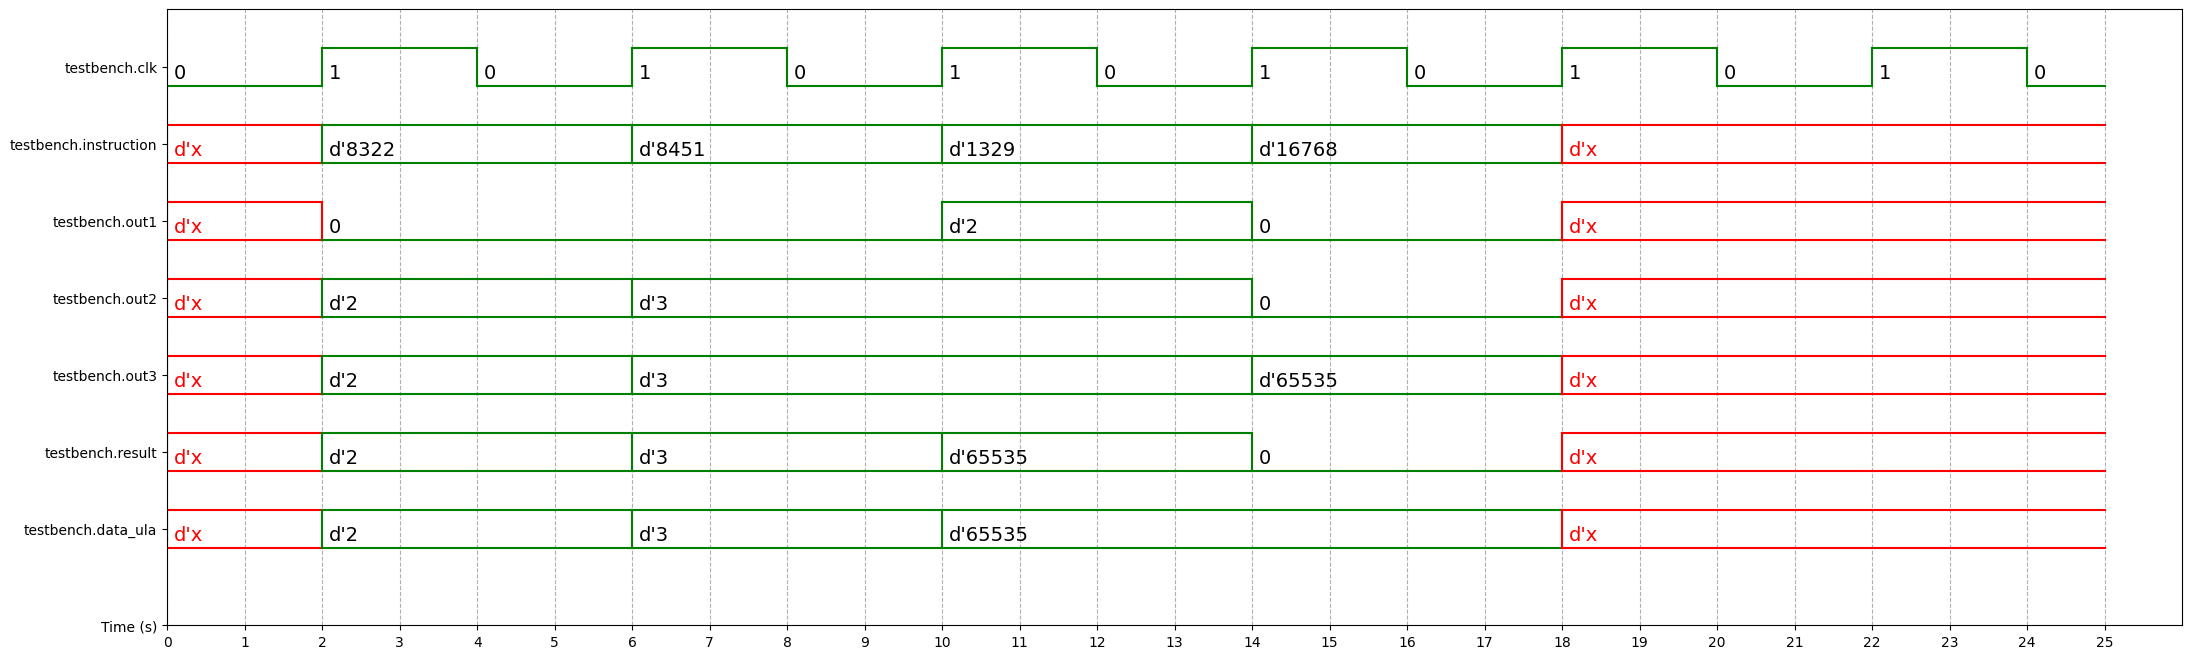

In [ ]:
%%waveform cpu.vcd

sign_list = ['testbench.clk', 'testbench.instruction', 'testbench.out1', 'testbench.out2', 'testbench.out3', 'testbench.result', 'testbench.data_ula']
time_begin = 0
time_end = 25
base = 'dec' # bin, dec, dec2, hex, octal